# Appendix B. Electromagnetic pressure calculation. magnetic mode

Let's consider rectangular resonator with size $a \times b \times h$.

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    latex_ex = latex(ex)
    display(Math(latex_ex))

mu = var('mu')
assume(mu, 'real')
assume(mu>0)

epsilon = var('epsilon')
assume(epsilon, 'real')
assume(epsilon>0)

k_1 = var ('k_x')
assume(k_1, 'real')

k_2 = var ('k_y')
assume(k_2, 'real')

k_3 = var ('k_z')
assume(k_3, 'real')

n_1 = var ('n_x')
assume(n_1, 'real')
assume(n_1, 'integer')

n_2 = var ('n_y')
assume(n_2, 'real')
assume(n_2, 'integer')

n_3 = var ('n_z')
assume(n_3, 'real')
assume(n_3, 'integer')

a = var('a')
assume(a, 'real')
assume(a>0)

b = var('b')
assume(b, 'real')
assume(b>0)

h = var('h')
assume(h, 'real')
assume(h>0)

x = var('x')
y = var('y')
z = var('z')

assume(x, 'real')
assume(y, 'real')
assume(z, 'real')

c = var('c')
assume(c, 'real')
assume(c>0)

omega = var('omega')
assume(omega, 'real')

In [2]:
k_subs_z = [k_3 == n_3 * pi / h]

In [3]:
k_subs_xy = [k_1 == n_1 * pi / a, k_2 == n_2 * pi / b]

In magnetic mode $\nabla\,\vec{H} + \frac{\omega^2}{c^2}\,\vec{H} = 0$ we have the following solution

In [4]:
B_1 = var ('B_1')
B_2 = var ('B_2')
B_3 = var ('B_3')

In [5]:
# выражения для магнитного поля

h_x = sin(k_1*x)*cos(k_2*y)*cos(k_3*z)
h_y = cos(k_1*x)*sin(k_2*y)*cos(k_3*z)
h_z = cos(k_1*x)*cos(k_2*y)*sin(k_3*z)

In [6]:
# выражения для магнитного поля

H_x = B_1*h_x
H_y = B_2*h_y
H_z = B_3*h_z

In [7]:
disp(H_x.subs(k_subs_xy))
disp(H_y.subs(k_subs_xy))
disp(H_z.subs(k_subs_xy))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

$$H_{x} = B_{1} \cos\left(\frac{\pi n_{y} y}{b}\right) \cos\left(k_{z} z\right) \sin\left(\frac{\pi n_{x} x}{a}\right)$$
$$H_{y} = B_{2} \cos\left(\frac{\pi n_{x} x}{a}\right) \cos\left(k_{z} z\right) \sin\left(\frac{\pi n_{y} y}{b}\right)$$
$$H_{z} = B_{3} \cos\left(\frac{\pi n_{x} x}{a}\right) \cos\left(\frac{\pi n_{y} y}{b}\right) \sin\left(k_{z} z\right)$$

$rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon \vec{E}$

In [8]:
rotH_x = H_z.diff(y) - H_y.diff(z)
rotH_y = H_x.diff(z) - H_z.diff(x)
rotH_z = H_y.diff(x) - H_x.diff(y)

In [9]:
E_x = - c / (I * omega * mu) * rotH_x
E_y = - c / (I * omega * mu) * rotH_y
E_z = - c / (I * omega * mu) * rotH_z

In [10]:
E_x = E_x.full_simplify().factor()
E_y = E_y.full_simplify().factor()
E_z = E_z.full_simplify().factor()

In [11]:
display(Math(latex(E_x.subs(k_subs_xy))))
display(Math(latex(E_y.subs(k_subs_xy))))
display(Math(latex(E_z.subs(k_subs_xy))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

and 

$$E_{x} = \frac{i \, {\left(B_{2} k_{z} - \frac{\pi B_{3} n_{y}}{b}\right)} c \cos\left(\frac{\pi n_{x} x}{a}\right) \sin\left(\frac{\pi n_{y} y}{b}\right) \sin\left(k_{z} z\right)}{\mu \omega}$$
$$E_{y} = -\frac{i \, {\left(B_{1} k_{z} - \frac{\pi B_{3} n_{x}}{a}\right)} c \cos\left(\frac{\pi n_{y} y}{b}\right) \sin\left(\frac{\pi n_{x} x}{a}\right) \sin\left(k_{z} z\right)}{\mu \omega}$$
$$E_{z} = -\frac{i \, {\left(\frac{\pi B_{2} n_{x}}{a} - \frac{\pi B_{1} n_{y}}{b}\right)} c \cos\left(k_{z} z\right) \sin\left(\frac{\pi n_{x} x}{a}\right) \sin\left(\frac{\pi n_{y} y}{b}\right)}{\mu \omega}$$

In [12]:
eqE_x = E_x.diff(x,2) + E_x.diff(y,2) + E_x.diff(z,2) + mu*epsilon*omega^2/c^2 * E_x == 0
eqE_y = E_y.diff(x,2) + E_y.diff(y,2) + E_y.diff(z,2) + mu*epsilon*omega^2/c^2 * E_y == 0
eqE_z = E_z.diff(x,2) + E_z.diff(y,2) + E_z.diff(z,2) + mu*epsilon*omega^2/c^2 * E_z == 0

In [13]:
eqH_x = H_x.diff(x,2) + H_x.diff(y,2) + H_x.diff(z,2) + mu*epsilon*omega^2/c^2 * H_x == 0
eqH_y = H_y.diff(x,2) + H_y.diff(y,2) + H_y.diff(z,2) + mu*epsilon*omega^2/c^2 * H_y == 0
eqH_z = H_z.diff(x,2) + H_z.diff(y,2) + H_z.diff(z,2) + mu*epsilon*omega^2/c^2 * H_z == 0

In [14]:
dispersion_eqH = (eqH_z.full_simplify().factor().lhs().operands()[0]/c^2).expand() == 0
disp(dispersion_eqH)

<IPython.core.display.Math object>

In [15]:
dispersion_eqE = (eqE_z.full_simplify().factor().lhs().operands()[0]/c^2).expand() == 0
disp(dispersion_eqE)

<IPython.core.display.Math object>

with

$$k_{z}^{2} + \frac{\pi^{2} n_{x}^{2}}{a^{2}} + \frac{\pi^{2} n_{y}^{2}}{b^{2}} - \frac{\omega^{2}}{c^{2}} = 0$$

using $div\,\vec{H} = 0$ we have

In [16]:
div_H = H_x.diff(x) + H_y.diff(y) + H_z.diff(z)
eq_B = div_H.full_simplify().factor().operands()[0] == 0
disp(eq_B)

<IPython.core.display.Math object>

In [17]:
eq_B = eq_B.subs(k_subs_xy)
disp(eq_B)

<IPython.core.display.Math object>


$$B_{3} k_{z} + \frac{\pi B_{1} n_{x}}{a} + \frac{\pi B_{2} n_{y}}{b} = 0$$

In [18]:
omega_2 = solve(eqE_x, omega^2)[0]
disp(omega_2)

<IPython.core.display.Math object>

In [19]:
omega_2 = solve(eqE_x, omega^2)[0]
omega_1 = solve(eqE_x, omega)[1]
disp(omega_1)

<IPython.core.display.Math object>

Field energy density $\left({\int \frac{H_x^2+H_y^2+H_z^2}{8 \pi}dV}\right)\big/{V}$ is

In [20]:
E_H = (((H_x^2+H_y^2+H_z^2)/(8*pi)) \
       .subs(omega_1).subs(k_subs_xy).subs(k_subs_z) \
       .subs(epsilon == 1, mu == 1) \
       .integrate(x, 0, a).integrate(y, 0, b).integrate(z, 0, h) \
       .subs(omega_2)/(a*b*h)).expand().full_simplify()
disp(E_H)

<IPython.core.display.Math object>

$$\frac{E}{V} = \frac{{\left(B_{1}^{2} + B_{2}^{2} + B_{3}^{2}\right)}}{64 \, \pi}$$

Full field energy density $\left(\int \frac{E_x^2+E_y^2+E_z^2}{8 \pi}dV + \int \frac{H_x^2+H_y^2+H_z^2}{8 \pi}dV\right)\big/{V}$ is

$$\frac{E}{V} = \frac{{\left(B_{1}^{2} + B_{2}^{2} + B_{3}^{2}\right)}}{32 \, \pi}$$

Electromagnetic pressure $\frac{\int \frac {H_x^2+H_y^2}{8 \pi} dS}{S}$ on $xy$ plate is

In [21]:
F_z = (((H_x^2+H_y^2)/(8*pi)) \
       .subs(omega_1).subs(omega_2).subs(k_subs_xy) \
       .subs(epsilon == 1, mu == 1) \
       .integrate(x, 0, a).integrate(y, 0, b).subs(z == 0) \
       /(a*b)).factor().full_simplify()
disp(F_z)
print ("\\frac{f_z}{S} = "+latex(F_z))

<IPython.core.display.Math object>

\frac{f_z}{S} = \frac{B_{1}^{2} + B_{2}^{2}}{32 \, \pi}


$$\frac{f_z}{S}=\frac{{\left(B_{1}^{2} + B_{2}^{2}\right)}}{32 \, \pi}$$

Their relation $\frac{f_z/S}{E/V}$ is

In [22]:
F_z_E = F_z / (E_H) / 2
disp(F_z_E)
print ("\\frac{f_z/S}{E/V} = "+latex(F_z_E))

<IPython.core.display.Math object>

\frac{f_z/S}{E/V} = \frac{B_{1}^{2} + B_{2}^{2}}{B_{1}^{2} + B_{2}^{2} + B_{3}^{2}}


$$\frac{f_z/S}{E/V} = \frac{{B_{1}^{2} + B_{2}^{2}}}{B_{1}^{2} + B_{2}^{2} + B_{3}^{2}}$$

Considering terms with wave propagation in $z$ direction we have $E_z = 0$ which give:

In [23]:
eq_Ez0 = E_z == 0

In [24]:
eq_Ez_0 = eq_Ez0.lhs().numerator().operands()[0] == 0

In [26]:
eq_Ez_0 = eq_Ez_0.subs(k_subs_xy)
disp(eq_Ez_0)
print (latex(eq_Ez_0))

<IPython.core.display.Math object>

\frac{\pi B_{2} n_{x}}{a} - \frac{\pi B_{1} n_{y}}{b} = 0


$$\frac{\pi B_{2} n_{x}}{a} - \frac{\pi B_{1} n_{y}}{a} = 0$$

In [27]:
B1_sol_z = solve(eq_B.subs(solve(eq_Ez_0, B_2)), B_1)[0].rhs()
B2_sol_z = solve(eq_B.subs(solve(eq_Ez_0, B_1)), B_2)[0].rhs()
disp(B1_sol_z)
disp(B2_sol_z)
print (latex(B_1 == B1_sol_z))
print (latex(B_2 == B2_sol_z))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

B_{1} = -\frac{B_{3} a b^{2} k_{z} n_{x}}{\pi b^{2} n_{x}^{2} + \pi a^{2} n_{y}^{2}}
B_{2} = -\frac{B_{3} a^{2} b k_{z} n_{y}}{\pi b^{2} n_{x}^{2} + \pi a^{2} n_{y}^{2}}


$$B_1 = -\frac{B_{3} a k_{z} n_{x}}{\pi n_{x}^{2} + \pi n_{y}^{2}}$$
$$B_2 = -\frac{B_{3} a k_{z} n_{y}}{\pi n_{x}^{2} + \pi n_{y}^{2}}$$

Relation of electromagnetic pressure per field energy density in this case is

In [28]:
F_z_E_z = F_z_E.subs(B_1 == B1_sol_z, B_2 = B2_sol_z).factor()
disp(F_z_E_z)

<IPython.core.display.Math object>

In [29]:
p_z_E_z = F_z_E_z.subs(b == a).full_simplify()
disp(p_z_E_z)

<IPython.core.display.Math object>

$$\frac{f_z/S}{E/V} = \frac{a^{2} k_{z}^{2}}{a^{2} k_{z}^{2} + \pi^{2} n_{x}^{2} + \pi^{2} n_{y}^{2}}$$

Considering terms with wave propagation in $x$ direction we have $E_x = 0$ which give:

In [30]:
eq_Ex0 = E_x == 0
eq_Ex_0 = eq_Ex0.lhs().numerator().operands()[0] == 0
eq_Ez_0 = eq_Ez_0.subs(k_subs_xy)
disp(eq_Ez_0)

<IPython.core.display.Math object>

In [31]:
B3_sol_x = solve(eq_B.subs(solve(eq_Ex_0, B_2)), B_3)[0].rhs()
B2_sol_x = solve(eq_B.subs(solve(eq_Ex_0, B_3)), B_2)[0].rhs()
disp(B3_sol_x)
disp(B2_sol_x)
print (latex(B_3 == B3_sol_x))
print (latex(B_2 == B2_sol_x))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

B_{3} = -\frac{\pi B_{1} b k_{z} n_{x}}{a b k_{z}^{2} + \pi a k_{y} n_{y}}
B_{2} = -\frac{\pi B_{1} b k_{y} n_{x}}{a b k_{z}^{2} + \pi a k_{y} n_{y}}


$$B_3 = -\frac{\pi B_{1} a k_{z} n_{x}}{a^{2} k_{z}^{2} + \pi^{2} n_{y}^{2}}, 
B_2 = -\frac{\pi^{2} B_{1} n_{x} n_{y}}{a^{2} k_{z}^{2} + \pi^{2} n_{y}^{2}}$$

Relation of electromagnetic pressure per field energy density in this case is

In [32]:
F_z_E_x = F_z_E.subs(B_3 == B3_sol_x, B_2 == B2_sol_x).subs(k_subs_xy).factor()
disp(F_z_E_x)
print("\\frac{f_z/S}{E/V} = "+latex(F_z_E_x))

<IPython.core.display.Math object>

\frac{f_z/S}{E/V} = \frac{a^{2} b^{4} k_{z}^{4} + 2 \, \pi^{2} a^{2} b^{2} k_{z}^{2} n_{y}^{2} + \pi^{4} b^{2} n_{x}^{2} n_{y}^{2} + \pi^{4} a^{2} n_{y}^{4}}{{\left(a^{2} b^{2} k_{z}^{2} + \pi^{2} b^{2} n_{x}^{2} + \pi^{2} a^{2} n_{y}^{2}\right)} {\left(b^{2} k_{z}^{2} + \pi^{2} n_{y}^{2}\right)}}


$$\frac{f_z/S}{E/V} = \frac{a^{2} b^{4} k_{z}^{4} + 2 \, \pi^{2} a^{2} b^{2} k_{z}^{2} n_{y}^{2} + \pi^{4} b^{2} n_{x}^{2} n_{y}^{2} + \pi^{4} a^{2} n_{y}^{4}}{{\left(a^{2} b^{2} k_{z}^{2} + \pi^{2} b^{2} n_{x}^{2} + \pi^{2} a^{2} n_{y}^{2}\right)} {\left(b^{2} k_{z}^{2} + \pi^{2} n_{y}^{2}\right)}}$$

In [33]:
p_z_E_x = F_z_E_x.subs(b == a).full_simplify()
disp(p_z_E_x)

<IPython.core.display.Math object>

Considering terms with wave propagation in $y$ direction $E_y = 0$ is similar to them in $x$ direction

In [34]:
eq_Ey0 = E_y == 0
disp(eq_Ey0)
eq_Ey_0 = eq_Ey0.lhs().numerator().operands()[0] == 0
disp(eq_Ey_0)
eq_Ey_0 = eq_Ey_0.subs(k_subs_xy)
disp(eq_Ey_0)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [35]:
B1_sol_y = solve(eq_B.subs(solve(eq_Ey_0, B_3)), B_1)[0].rhs()
B3_sol_y = solve(eq_B.subs(solve(eq_Ey_0, B_1)), B_3)[0].rhs()
disp(B1_sol_y)
disp(B3_sol_y)
print (latex(B_1 == B1_sol_y))
print (latex(B_3 == B3_sol_y))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

B_{1} = -\frac{\pi^{2} B_{2} a n_{x} n_{y}}{a^{2} b k_{z}^{2} + \pi^{2} b n_{x}^{2}}
B_{3} = -\frac{\pi B_{2} a^{2} k_{z} n_{y}}{a^{2} b k_{z}^{2} + \pi^{2} b n_{x}^{2}}


$$B_3 = -\frac{\pi B_{2} a k_{z} n_{y}}{a^{2} k_{z}^{2} + \pi^{2} n_{x}^{2}}, 
B_1 = -\frac{\pi^{2} B_{2} n_{x} n_{y}}{a^{2} k_{z}^{2} + \pi^{2} n_{x}^{2}}$$

Relation of electromagnetic pressure per field energy density in this case is

In [36]:
F_z_E_y = F_z_E.subs(B_1 == B1_sol_y, B_3 = B3_sol_y).subs(k_subs_xy).factor()
disp(F_z_E_y)
print("\\frac{f_z/S}{E/V} = "+latex(F_z_E_y))

<IPython.core.display.Math object>

\frac{f_z/S}{E/V} = \frac{a^{4} b^{2} k_{z}^{4} + 2 \, \pi^{2} a^{2} b^{2} k_{z}^{2} n_{x}^{2} + \pi^{4} b^{2} n_{x}^{4} + \pi^{4} a^{2} n_{x}^{2} n_{y}^{2}}{{\left(a^{2} b^{2} k_{z}^{2} + \pi^{2} b^{2} n_{x}^{2} + \pi^{2} a^{2} n_{y}^{2}\right)} {\left(a^{2} k_{z}^{2} + \pi^{2} n_{x}^{2}\right)}}


$$\frac{f_z/S}{E/V} = \frac{a^{4} b^{2} k_{z}^{4} + 2 \, \pi^{2} a^{2} b^{2} k_{z}^{2} n_{x}^{2} + \pi^{4} b^{2} n_{x}^{4} + \pi^{4} a^{2} n_{x}^{2} n_{y}^{2}}{{\left(a^{2} b^{2} k_{z}^{2} + \pi^{2} b^{2} n_{x}^{2} + \pi^{2} a^{2} n_{y}^{2}\right)} {\left(a^{2} k_{z}^{2} + \pi^{2} n_{x}^{2}\right)}}$$

In [37]:
disp((F_z_E_y.subs(b == a)).full_simplify())

<IPython.core.display.Math object>

In [38]:
p_z_E_z.subs(n_x == 1, n_y == 1)

a^2*k_z^2/(a^2*k_z^2 + 2*pi^2)

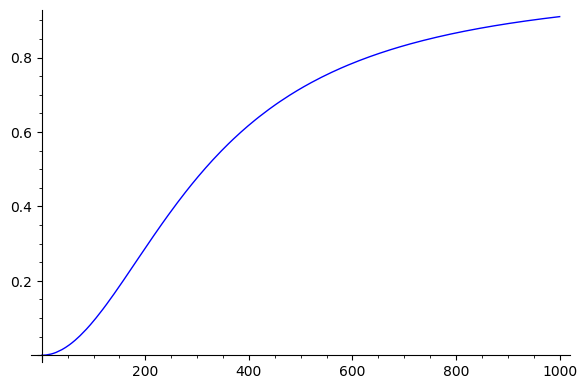

In [39]:
plot(p_z_E_z.subs(a == 1, n_x == 1, n_y == 100), k_z, 0, 1000)

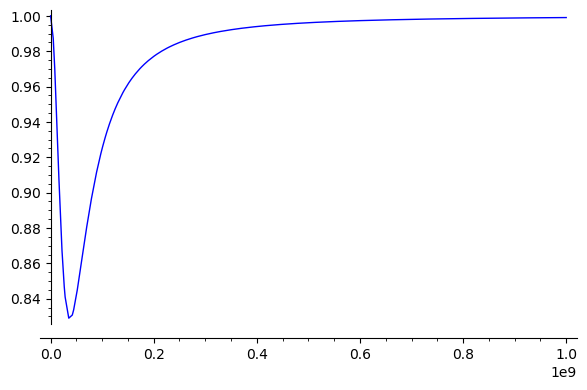

In [40]:
plot(p_z_E_x.subs(a == 0.0001, n_x == 1000, n_y == 1000), k_z, 0, 1000000000)

In [41]:
limit(F_z_E_x, k_z=Infinity)

1

In [42]:
limit(F_z_E_y, k_z=Infinity)

1

In [43]:
limit(F_z_E_z, k_z=Infinity)

1